In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 2.4 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [ ]:
!python --version ou !python -V

Python 3.7.15


In [ ]:
def get_twitterdata(searchq, maxTweets, filename, since, until):
  timafilter = 1;

In [ ]:
#Escoteiro until:2022-09-30 since:2022-01-01
query = "(Escoteiro OR Escotismo OR Desbravadores) lang:pt until:2022-09-30 since:2022-01-01"
tweets = []
limit = 20000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, tweet.id])

df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'ID'])
print(df)

ERROR:snscrape.base:Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=%28Escoteiro+OR+Escotismo+OR+Desbravadores%29+lang%3Apt+until%3A2022-09-30+since%3A2022-01-01&tweet_search_mode=live&count=20&query_source=spelling_expansion_

ScraperException: ignored

In [ ]:
df

,Date,User,Tweet,ID
0,2022-09-29 23:50:39+00:00,sunooeasy,achei um hyuka escoteiro por 400😞😞🥺,1575634189600231424
1,2022-09-29 23:30:24+00:00,everlaurentino,@neferpitow old q escoteiro eh elitista https:...,1575629094661672960
2,2022-09-29 22:42:44+00:00,_AgataCris_,Já já episódio 47 da campanha Desbravadores de...,1575617097358770178
3,2022-09-29 22:26:23+00:00,cos_stellla,Gemte ninguém quer ir no café escoteiro? vamo...,1575612984889839616
4,2022-09-29 22:05:31+00:00,biavinholt,@thebestBROLAF Fazia isso no clube de desbrava...,1575607732291268608
...,...,...,...,...
10437,2022-01-01 02:28:30+00:00,FifaPeletti,Que possamos estar juntos em 2022 jogando dive...,1477104416314605568
10438,2022-01-01 02:26:30+00:00,FifaPeletti,Obrigado a todos os integrantes do nosso Bando...,1477103910326190082
10439,2022-01-01 02:20:31+00:00,jimmerms,fazer a faixa de escoteiro do guri de up só qu...,1477102405250686978
10440,2022-01-01 00:34:11+00:00,fairyyas_,"eh gosto do escoteiro, amo acampar no meio do ...",1477075645922484226


In [ ]:
#Como Salvar em CSV
#https://www.youtube.com/watch?v=_4o_45o3iHA
#https://medium.com/machine-learning-mastery/how-to-scrape-millions-of-tweets-using-snscraper-aa47cee400ec

df.to_csv('teste.csv', sep='\t', index = False)
#O correto é salvar separando com \t e não com vírgula, pq tweets tem viírgulas

NameError: ignored

# 2 - Teste de Classificação

##2.1 - Teste de CLassificação

In [ ]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 8.7 MB/s 
     |████████████████████████████████| 182 kB 59.6 MB/s 
     |████████████████████████████████| 7.6 MB 46.5 MB/s 


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = BertForSequenceClassification.from_pretrained('neuralmind/bert-base-portuguese-cased')

Downloading:   0%|          | 0.00/210k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/647 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the

In [ ]:
inputs = tokenizer("Bom dia", return_tensors="pt")
labels = torch.tensor([1]).unsqueeze(0)
outputs = model(**inputs, labels=labels)
loss = outputs.loss
logits = outputs.logits
print(loss)
print(logits)

tensor(0.6937, grad_fn=<NllLossBackward0>)
tensor([[0.1119, 0.1109]], grad_fn=<AddmmBackward0>)


2.2 Teste de Classificação Pipeline

In [ ]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
res = classifier("I am sad")
print(res)

[{'label': 'NEGATIVE', 'score': 0.9991856217384338}]


In [ ]:
from transformers import pipeline

In [ ]:
##https://huggingface.co/philschmid/distilbert-base-multilingual-cased-sentiment-2?text=I+like+you.+I+love+you
from transformers import pipeline
unmasker = pipeline(model='philschmid/distilbert-base-multilingual-cased-sentiment-2')
unmasker("feliz aniversário")

Downloading:   0%|          | 0.00/814 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/541M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.8365696668624878}]

In [ ]:
##https://huggingface.co/rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment
unmasker = pipeline(model='rohanrajpal/bert-base-multilingual-codemixed-cased-sentiment')
unmasker("Feliz aniversário")

Downloading:   0%|          | 0.00/828 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/712M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'LABEL_2', 'score': 0.9610565304756165}]

In [ ]:
## ?
unmasker = pipeline(model='philschmid/distilbert-base-multilingual-cased-sentiment')
unmasker("Feliz aniversário")

Downloading:   0%|          | 0.00/814 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/541M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'positive', 'score': 0.9602950811386108}]

In [ ]:
##https://https://huggingface.co/Chirayu/mt5-multilingual-sentiment
unmasker = pipeline(model='Chirayu/mt5-multilingual-sentiment')
unmasker("Feliz aniversário")

Downloading:   0%|          | 0.00/677 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/962 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/407 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.33M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

[{'generated_text': 'Positive'}]

#3 - N-grams

## 3.1 - Pré Processamento

In [ ]:
df_news = df

In [ ]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""
  for i in text:
    if i not in string.punctuation:
      ans+=i
  return ans

In [ ]:
#storing the puntuation free text in a new column called clean_msg
df_news['Tweet_news']= df_news['Tweet'].apply(lambda x:remove_punctuation(x))
df_news.head()

,Date,User,Tweet,ID,Tweet_news
0,2022-09-29 23:50:39+00:00,sunooeasy,achei um hyuka escoteiro por 400😞😞🥺,1575634189600231424,achei um hyuka escoteiro por 400😞😞🥺
1,2022-09-29 23:30:24+00:00,everlaurentino,@neferpitow old q escoteiro eh elitista https:...,1575629094661672960,neferpitow old q escoteiro eh elitista httpstc...
2,2022-09-29 22:42:44+00:00,_AgataCris_,Já já episódio 47 da campanha Desbravadores de...,1575617097358770178,Já já episódio 47 da campanha Desbravadores de...
3,2022-09-29 22:26:23+00:00,cos_stellla,Gemte ninguém quer ir no café escoteiro? vamo...,1575612984889839616,Gemte ninguém quer ir no café escoteiro vamo ...
4,2022-09-29 22:05:31+00:00,biavinholt,@thebestBROLAF Fazia isso no clube de desbrava...,1575607732291268608,thebestBROLAF Fazia isso no clube de desbravad...


##3.2 - Code to generate n-grams

In [ ]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

#stopwords em português
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords)]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Teste

#amostra!
generate_N_grams("O sol nasce no leste",3)

Sentence after removing stopwords: ['O', 'sol', 'nasce', 'leste']


['O sol nasce', 'sol nasce leste']

##3.3 - Creating unigrams

A saída de streaming foi truncada nas últimas 5000 linhas.
Sentence after removing stopwords: ['12º', 'Encontro', 'Regional', 'Ramo', 'Escoteiro', '', 'ERESCOT\n\n👕E', 'quer', 'adquirir', 'peças', 'extras', 'enxoval', 'evento', 'confere', 'Informativo\nhttpstcofQufPCX7hX\n\nEscoteirosRS', 'ERESCOT2022']
Sentence after removing stopwords: ['12º', 'ERESCOT\n📅Data', '20', '2108\n💻Local', 'Escritório', 'Regional', 'Escoteiro', 'Porto', 'Alegre\n📝Inscrições', '1007\n💰Valor', 'De', 'acordo', 'categoria\n✅Podem', 'participar', 'Monitores', 'Escotistas', 'Ramo', 'Escoteiro\n\U0001faa2Inscrições', 'Meu', 'Paxtu\n\n⚠️httpstcoSIERpzkZcn\n\nERESCOT2022']
Sentence after removing stopwords: ['gerdwenzel', 'desbravadores', 'intrépidos', '', 'boas', 'lembranças', 'manhãs', 'Budensliga']
Sentence after removing stopwords: ['Curso', 'Intermediário', 'EaD', '', 'Linha', 'Dirigente\nCurso', 'Intermediário', 'EaD', '', 'Linha', 'Escotista', '', 'Ramos', 'Lobinho', 'Escoteiro', 'Sênior', 'Pioneiro\n📅Data', 

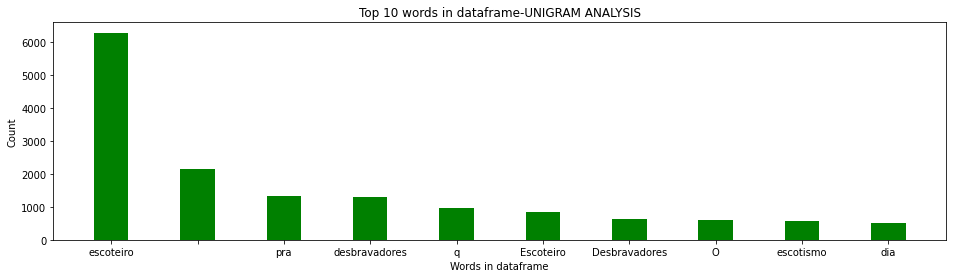

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

value = defaultdict(int)

for text in df_news['Tweet_news']:
  for word in generate_N_grams(text):
    value[word]+=1

df_unigram=pd.DataFrame(sorted(value.items(),key=lambda x:x[1],reverse=True))

pd1=df_unigram[0][:10]
pd2=df_unigram[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe-UNIGRAM ANALYSIS")
plt.savefig("unigram.png")
plt.show()

##3.4 - Creating bigrams

A saída de streaming foi truncada nas últimas 5000 linhas.
Sentence after removing stopwords: ['12º', 'Encontro', 'Regional', 'Ramo', 'Escoteiro', '', 'ERESCOT\n\n👕E', 'quer', 'adquirir', 'peças', 'extras', 'enxoval', 'evento', 'confere', 'Informativo\nhttpstcofQufPCX7hX\n\nEscoteirosRS', 'ERESCOT2022']
Sentence after removing stopwords: ['12º', 'ERESCOT\n📅Data', '20', '2108\n💻Local', 'Escritório', 'Regional', 'Escoteiro', 'Porto', 'Alegre\n📝Inscrições', '1007\n💰Valor', 'De', 'acordo', 'categoria\n✅Podem', 'participar', 'Monitores', 'Escotistas', 'Ramo', 'Escoteiro\n\U0001faa2Inscrições', 'Meu', 'Paxtu\n\n⚠️httpstcoSIERpzkZcn\n\nERESCOT2022']
Sentence after removing stopwords: ['gerdwenzel', 'desbravadores', 'intrépidos', '', 'boas', 'lembranças', 'manhãs', 'Budensliga']
Sentence after removing stopwords: ['Curso', 'Intermediário', 'EaD', '', 'Linha', 'Dirigente\nCurso', 'Intermediário', 'EaD', '', 'Linha', 'Escotista', '', 'Ramos', 'Lobinho', 'Escoteiro', 'Sênior', 'Pioneiro\n📅Data', 

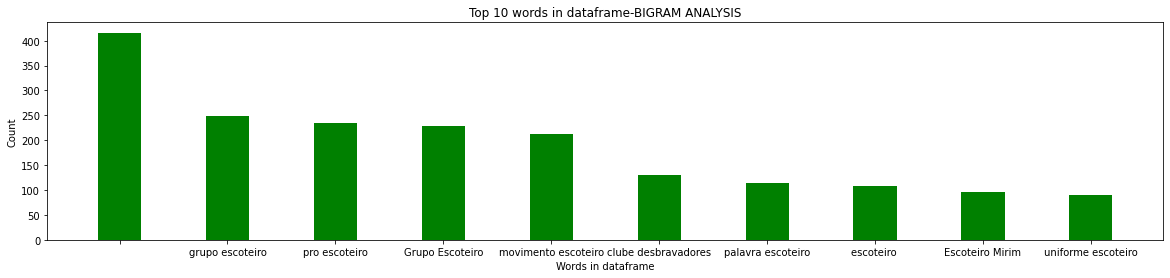

In [ ]:
values2 = defaultdict(int)

for text in df_news['Tweet_news']:
  for word in generate_N_grams(text,2):
    values2[word]+=1

df_bigrams=pd.DataFrame(sorted(values2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_bigrams[0][:10]
pd2bi=df_bigrams[1][:10]

plt.figure(1,figsize=(20,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe-BIGRAM ANALYSIS")
plt.savefig("bigram.png")
plt.show()

##3.5 - Creating trigrams

A saída de streaming foi truncada nas últimas 5000 linhas.
Sentence after removing stopwords: ['gasta', 'horrores', 'irmao', 'bosta', 'escoteiro', 'agr', 'temq', 'gata', 'minimo', 'pq', 'eh', 'realmente', 'ri', 'precisando']
Sentence after removing stopwords: ['nao', 'adianta', 'clube', 'desbravadores', 'sempre', 'vai', 'puxar', 'volta', 'posso', 'sair', '500mil', 'vezes', 'vou', 'voltar']
Sentence after removing stopwords: ['Eu', 'encontrar', 'grupo', 'Escoteiro', 'baixada', 'urgente']
Sentence after removing stopwords: ['Nada', 'justo', 'volta', 'escoteiro', 'azul', 'tempo', 'personagem', 'ainda', 'acabou', 'httpstcoVGwlGr4vkK']
Sentence after removing stopwords: ['Trabalho', 'grupos', 'escoteiros', 'Araraquara', 'reconhecido', 'Câmara', 'Homenagem', 'aconteceu', 'meio', 'entrega', 'Diploma', 'Mérito', 'Escoteiro', 'instituído', 'lei', 'vereador', 'Rafael', 'Angeli', 'PSDB', 'httpstcoyiDTrqlRTq']
Sentence after removing stopwords: ['b33art', 'ketterdame', 'Aqui', 'Brasil', 'ensinam',

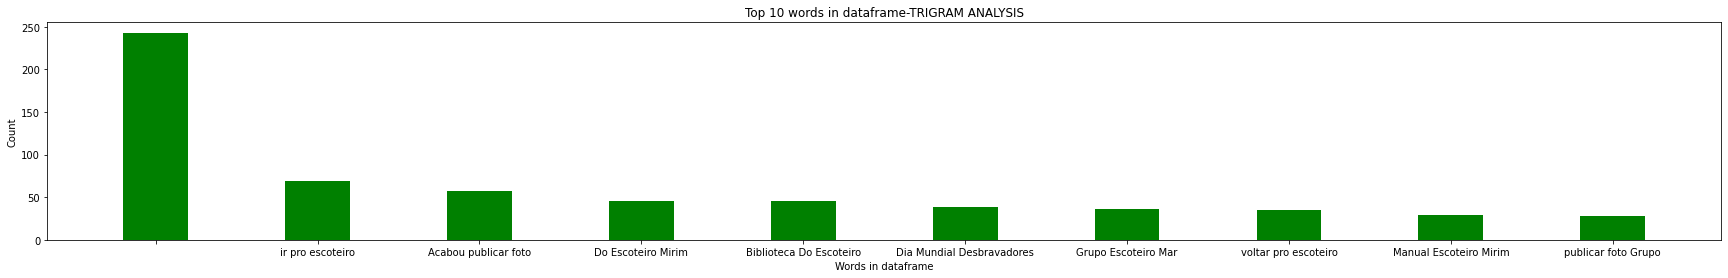

In [ ]:
values3 = defaultdict(int)

for text in df_news['Tweet_news']:
  for word in generate_N_grams(text,3):
    values3[word]+=1

df_trigram=pd.DataFrame(sorted(values3.items(),key=lambda x:x[1],reverse=True))

pd1tri=df_trigram[0][:10]
pd2tri=df_trigram[1][:10]

plt.figure(1,figsize=(30,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()